In [10]:
from __future__ import print_function, division
import numpy as np
import math

In [15]:
u1, u2 = np.array([1,3,0])*(1/math.sqrt(10)), np.array([-3,1,10])*(1/math.sqrt(110))

In [17]:
np.dot(u1,u2)

-1.3877787807814457e-17

In [18]:
u1*(-18/math.sqrt(10))+u2*(22/math.sqrt(110))

array([-2.4, -5.2,  2. ])

In [19]:
(-18/10)+(22*3/110)

-1.2000000000000002

In [23]:
(-18*110+66*10)/1100

-1.2

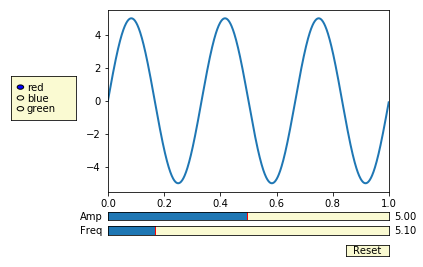

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

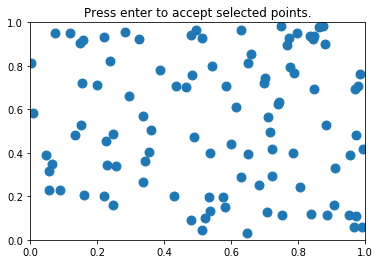

In [7]:
import numpy as np

from matplotlib.widgets import LassoSelector
from matplotlib.path import Path


class SelectFromCollection(object):
    """Select indices from a matplotlib collection using `LassoSelector`.

    Selected indices are saved in the `ind` attribute. This tool fades out the
    points that are not part of the selection (i.e., reduces their alpha
    values). If your collection has alpha < 1, this tool will permanently
    alter the alpha values.

    Note that this tool selects collection objects based on their *origins*
    (i.e., `offsets`).

    Parameters
    ----------
    ax : :class:`~matplotlib.axes.Axes`
        Axes to interact with.

    collection : :class:`matplotlib.collections.Collection` subclass
        Collection you want to select from.

    alpha_other : 0 <= float <= 1
        To highlight a selection, this tool sets all selected points to an
        alpha value of 1 and non-selected points to `alpha_other`.
    """

    def __init__(self, ax, collection, alpha_other=0.3):
        self.canvas = ax.figure.canvas
        self.collection = collection
        self.alpha_other = alpha_other

        self.xys = collection.get_offsets()
        self.Npts = len(self.xys)

        # Ensure that we have separate colors for each object
        self.fc = collection.get_facecolors()
        if len(self.fc) == 0:
            raise ValueError('Collection must have a facecolor')
        elif len(self.fc) == 1:
            self.fc = np.tile(self.fc, (self.Npts, 1))

        self.lasso = LassoSelector(ax, onselect=self.onselect)
        self.ind = []

    def onselect(self, verts):
        path = Path(verts)
        self.ind = np.nonzero(path.contains_points(self.xys))[0]
        self.fc[:, -1] = self.alpha_other
        self.fc[self.ind, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()

    def disconnect(self):
        self.lasso.disconnect_events()
        self.fc[:, -1] = 1
        self.collection.set_facecolors(self.fc)
        self.canvas.draw_idle()


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    data = np.random.rand(100, 2)

    subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
    fig, ax = plt.subplots(subplot_kw=subplot_kw)

    pts = ax.scatter(data[:, 0], data[:, 1], s=80)
    selector = SelectFromCollection(ax, pts)

    def accept(event):
        if event.key == "enter":
            print("Selected points:")
            print(selector.xys[selector.ind])
            selector.disconnect()
            ax.set_title("")
            fig.canvas.draw()

    fig.canvas.mpl_connect("key_press_event", accept)
    ax.set_title("Press enter to accept selected points.")

    plt.show()

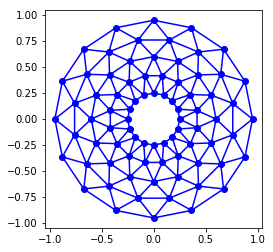

In [8]:
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Polygon
import numpy as np


def update_polygon(tri):
    if tri == -1:
        points = [0, 0, 0]
    else:
        points = triang.triangles[tri]
    xs = triang.x[points]
    ys = triang.y[points]
    polygon.set_xy(np.column_stack([xs, ys]))


def motion_notify(event):
    if event.inaxes is None:
        tri = -1
    else:
        tri = trifinder(event.xdata, event.ydata)
    update_polygon(tri)
    plt.title('In triangle %i' % tri)
    event.canvas.draw()


# Create a Triangulation.
n_angles = 16
n_radii = 5
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
triang = Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# Use the triangulation's default TriFinder object.
trifinder = triang.get_trifinder()

# Setup plot and callbacks.
plt.subplot(111, aspect='equal')
plt.triplot(triang, 'bo-')
polygon = Polygon([[0, 0], [0, 0]], facecolor='y')  # dummy data for xs,ys
update_polygon(-1)
plt.gca().add_patch(polygon)
plt.gcf().canvas.mpl_connect('motion_notify_event', motion_notify)
plt.show()